# The Sparks Foundation 

# GRIPMar21

# Data Science and Business Analytics 



# Task 1- Prediction using Supervised ML 

## Author: Nancy Selvam M

### Importing required libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset from the given source

In [19]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

### Exploring the dataset

In [20]:
dataset.shape

(25, 2)

In [21]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### checking for missing values

In [23]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualising the dataset

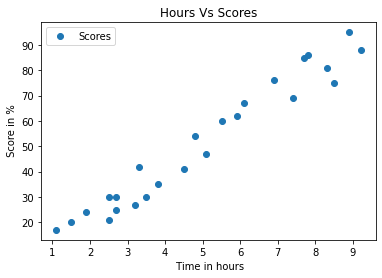

In [24]:
dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Hours Vs Scores")
plt.xlabel(" Time in hours")
plt.ylabel(" Score in %")
plt.show()

#### You can see that there is a positive linear relation between
#### the independent variable (Hours) and the target variable (Scores)

### Correlation

In [25]:
corr = dataset.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### According to the correlation value, there is a direct strong relationship between 
#### the inpendent variable (Hours) and the target variable (Scores)

### Assessing the data to variables
#### x = Hours
#### y = Scores

In [26]:
x = dataset.iloc[:,:-1].values
print(x)
y = dataset.iloc[:,1].values
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting the dataset into training and test set

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .3, random_state = 0)


### Building the model

In [28]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

###  Intercept and slope parameters

In [34]:
print(model.intercept_)
print(model.coef_[0])

2.370815382341881
9.788566686749046


### Fitting the regression line

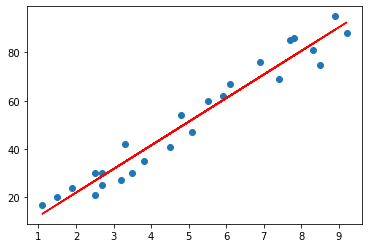

In [30]:
reg_line = model.intercept_+ model.coef_*x

plt.scatter(x,y)
plt.plot(x,reg_line,c = "red")
plt.show()

### Making predictions

In [35]:
print(x_test)
y_predicted = model.predict(x_test)
print(y_predicted)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


### comparing the actual and predicted values

In [18]:
comp_df = pd.DataFrame({"Actual ": y_test,"Predicted ":y_predicted})
print(comp_df)

   Actual   Predicted 
0       20   17.053665
1       27   33.694229
2       69   74.806209
3       30   26.842232
4       62   60.123359
5       35   39.567369
6       24   20.969092
7       86   78.721636


### Evaluating the model

In [42]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_predicted)
MSE = metrics.mean_squared_error(y_test,y_predicted)
RMSE = np.sqrt(MSE)
print(MAE,MSE,RMSE)

4.419727808027652 22.96509721270043 4.792191274636315


### What will be the predicted score if a student studies for 9.25 hrs/ day?

In [43]:
hours = 9.25
test = np.array([hours]).reshape(-1,1)
prediction = model.predict(test)
print("Number of hours studied: {} ".format(hours))
print("Predicted score: {}".format(prediction[0]))


Number of hours studied: 9.25 
Predicted score: 92.91505723477056
